In [1]:
immutable Unum
    s::Int    # sign
    e::Int    # exponent
    f::Int    # fraction
    u::Int    # ubit
    esm1::Int   # exponent size - 1
    fsm1::Int   # fraction size - 1
    ########
    es::Int
    fs::Int
    bias::Int

    Unum(s, e, f, u, esm1, fsm1) = new(s, e, f, u, esm1, fsm1, esm1+1, fsm1+1, 2^esm1-1)
end

In [2]:
Base.sign(u::Unum) = u.s == 0 ? +1 : -1

sign (generic function with 8 methods)

In [3]:
esizesize,fsizesize = 2, 2  # utag = [esizesize, fsizesize]

(2,2)

In [4]:
u = Unum(0, 0, 0, 0, 0, 0)

Unum(0,0,0,0,0,0,1,1,0)

In [5]:
function call(::Type{Float64}, u::Unum)
    denominator = 1 << u.fs
    
    if u.e == 0 
        sign(u) * 2.0^(1-u.bias) * u.f / denominator  # assumes u.s is 0 or 1
        
    elseif u.e == 1<<u.es-1 && u.f==1<<u.fs-1 && es==(1<<esizesize) && fs==(1<<fsizesize)
        # not efficient!
        sign(u) * Inf
        
    else
        sign(u) * 2.0^(u.e-u.bias) * (1.0 + u.f/denominator)
    end
    
end

Base.convert(::Type{Float64}, u::Unum) = Float64(u)

convert (generic function with 535 methods)

In [6]:
convert(Float64,Unum(0,1,1,0,2,0))

0.375

In [7]:
Float64(Unum(0,1,1,0,2,0))

0.375

In [8]:
esizesize, fsizesize = 2, 2
es = 1 << esizesize
fs = 1 << fsizesize

unums = vec([Unum(0, e, f, 0, es-1, fs-1) for e=0:2^es-1, f=0:2^fs-1])

nums = map(Float64, unums)
sort!(nums)

for z in nums
    print(rationalize(z), ", ")
end

0//

In [9]:
length(nums)

256

In [10]:
table = Vector{Float64}[]
for e in 0 : 2^es-1
    push!(table, [Float64(Unum(0, e, f, 0, es-1, fs-1)) for f in 0 : 2^fs-1])
end
[map(rationalize, x) for x in table]

1, 1//1024, 1//512, 3//1024, 1//256, 5//1024, 3//512, 7//1024, 1//128, 9//1024, 5//512, 11//1024, 3//256, 13//1024, 7//512, 15//1024, 1//64, 17//1024, 9//512, 19//1024, 5//256, 21//1024, 11//512, 23//1024, 3//128, 25//1024, 13//512, 27//1024, 7//256, 29//1024, 15//512, 31//1024, 1//32, 17//512, 9//256, 19//512, 5//128, 21//512, 11//256, 23//512, 3//64, 25//512, 13//256, 27//512, 7//128, 29//512, 15//256, 31//512, 1//16, 17//256, 9//128, 19//256, 5//64, 21//256, 11//128, 23//256, 3//32, 25//256, 13//128, 27//256, 7//64, 29//256, 15//128, 31//256, 1//8, 17//128, 9//64, 19//128, 5//32, 21//128, 11//64, 23//128, 3//16, 25//128, 13//64, 27//128, 7//32, 29//128, 15//64, 31//128, 1//4, 17//64, 9//32, 19//64, 5//16, 21//64, 11//32, 23//64, 3//8, 25//64, 13//32, 27//64, 7//16, 29//64, 15//32, 31//64, 1//2, 17//32, 9//16, 19//32, 5//8, 21//32, 11//16, 23//32, 3//4, 25//32, 13//16, 27//32, 7//8, 29//32, 15//16, 31//32, 1//1, 17//16, 9//8, 19//16, 5//4, 21//16, 11//8, 23//16, 3//2, 25//16, 13//8, 

16-element Array{Any,1}:
 Rational{Int64}[0//1,1//1024,1//512,3//1024,1//256,5//1024,3//512,7//1024,1//128,9//1024,5//512,11//1024,3//256,13//1024,7//512,15//1024]         
 Rational{Int64}[1//64,17//1024,9//512,19//1024,5//256,21//1024,11//512,23//1024,3//128,25//1024,13//512,27//1024,7//256,29//1024,15//512,31//1024]
 Rational{Int64}[1//32,17//512,9//256,19//512,5//128,21//512,11//256,23//512,3//64,25//512,13//256,27//512,7//128,29//512,15//256,31//512]         
 Rational{Int64}[1//16,17//256,9//128,19//256,5//64,21//256,11//128,23//256,3//32,25//256,13//128,27//256,7//64,29//256,15//128,31//256]           
 Rational{Int64}[1//8,17//128,9//64,19//128,5//32,21//128,11//64,23//128,3//16,25//128,13//64,27//128,7//32,29//128,15//64,31//128]                
 Rational{Int64}[1//4,17//64,9//32,19//64,5//16,21//64,11//32,23//64,3//8,25//64,13//32,27//64,7//16,29//64,15//32,31//64]                         
 Rational{Int64}[1//2,17//32,9//16,19//32,5//8,21//32,11//16,23//32,3//4,25//32,13//16,

In [11]:
length(nums)

256

In [12]:
2 in nums

true

In [13]:
using PyPlot

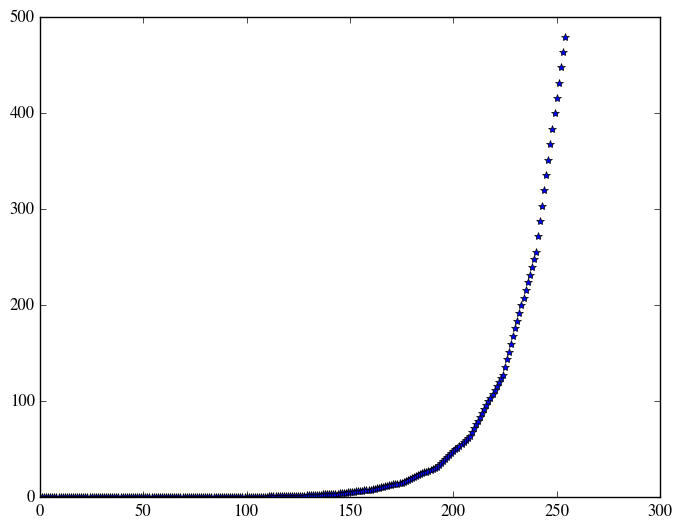

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31f5f1250>

In [14]:
plot(nums, "*")

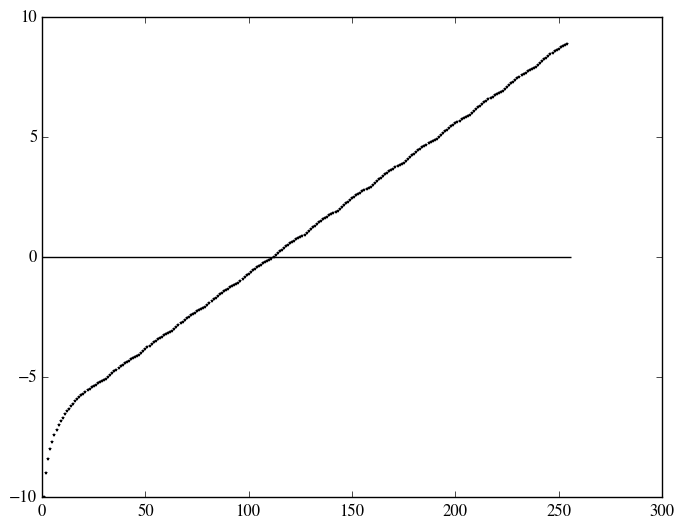

PyObject <matplotlib.collections.LineCollection object at 0x31f5a8dd0>

In [15]:
plot(log2(nums), "*", markersize=2)
hlines([0], 0, length(nums))

In [16]:
size(nums)

(256,)

In [17]:
integer_indices = Bool[isinteger(zz) for zz in nums];

In [18]:
showall(map(Int, nums[integer_indices]))

[0

# Extract bits from Float64 

In [19]:
x = 0.125

0.125

In [20]:
bits(x)

"0011111111000000000000000000000000000000000000000000000000000000"

In [21]:
exponent(x)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,68,72,76,80,84,88,92,96,100,104,108,112,116,120,124,128,136,144,152,160,168,176,184,192,200,208,216,224,232,240,248,256,272,288,304,320,336,352,368,384,400,416,432,448,464,480]

-3

In [22]:
@which exponent(x)

exponent{T<:AbstractFloat}(x::T<:AbstractFloat) at math.jl:199

In [23]:
significand(x)

1.0

In [24]:
Base.significand_bits(x)

LoadError: LoadError: MethodError: `significand_bits` has no method matching significand_bits(::Float64)
while loading In[24], in expression starting on line 1

In [25]:
Base.significand_mask(Float64)

0x000fffffffffffff

In [26]:
reinterpret(Int64, x) & Base.significand_mask(Float64)

0x0000000000000000

In [27]:
y = 2.0^(-1) + 2.0^(-3)

0.625

In [28]:
significand(y), exponent(y)

(1.25,-1)

In [29]:
significand(y) * 2.0^(exponent(y)) == y

true

In [30]:
ldexp(significand(y), exponent(y)) == y

true

In [31]:
bits(reinterpret(Int64, y) & Base.significand_mask(Float64))

"0000000000000100000000000000000000000000000000000000000000000000"

In [32]:
trailing_zeros(reinterpret(Int64, y) & Base.significand_mask(Float64))

50

In [33]:
Base.significand_bits(Float64)

52

In [34]:
import Base: significand_bits

In [35]:
significand_bits(x::Float64) = reinterpret(Int64, x) & Base.significand_mask(Float64)

significand_bits (generic function with 2 methods)

In [36]:
methods(significand_bits)

# 2 methods for generic function "significand_bits":
significand_bits{T<:AbstractFloat}(::Type{T<:AbstractFloat}) at float.jl:452
significand_bits(x::Float64) at In[35]:1

In [37]:
function num_significand_bits(x::Float64) 
    
    trailing = trailing_zeros(significand_bits(x))
    
    trailing < 64 ? 53-trailing : 0   # trailing is 64 for e.g. 8.0
end

    

num_significand_bits (generic function with 1 method)

In [38]:
num_significand_bits(0.625)

3

In [39]:
num_significand_bits(4.0)

0

In [40]:
max_exponent_size = 1 << esizesize
max_exponent = 1 << max_exponent_size

maxbias = 1 << (max_exponent_size-1)

min_exponent = 0 - maxbias
max_exponent = max_exponent - maxbias

min_exponent, max_exponent

max_num_bits_significand = 1 << fsizesize

4

In [41]:
function is_unum_representable(x::Float64)
    @show num_sig_bits = num_significand_bits(x)
    @show expo = exponent(x)
    
    num_sig_bits < (1 << fsizesize) && min_exponent < expo < max_exponent
end

is_unum_representable (generic function with 1 method)

In [42]:
is_unum_representable(0.625)

num_sig_bits = num_significand_bits(x) = 3

true

In [43]:
is_unum_representable(8.0)

true

In [44]:
is_unum_representable(float(pi))

false

In [45]:
bits(float(pi))

"0100000000001001001000011111101101010100010001000010110100011000"

In [46]:
function Unum(x::Float64)
    
    @show num_sig_bits = num_significand_bits(x)
    @show expo = exponent(x)
    
    if min_exponent < expo < max_exponent
        e = expo  # change this to use min number of bits
        
    else 
        error("Exponent out of bounds")  # too big or too small -- CHANGE to 0+ or Inf
    end
    
    signif = reinterpret(UInt64, significand(x))
    if num_sig_bits <= (1 << fsizesize)
        u = 0
    else
        u = 1

    end
    
    f = signif >> (52 - max_num_bits_significand)  # change this to use minimum

    s = sign(x)    # sign

    esm1 = (1 << esizesize) - 1   # CHANGE!
    fsm1 = (1 << fsizesize) - 1   # CHANGE!
    
    Unum(s, e, f, u, esm1, fsm1)
    
end

Unum


expo = exponent(x) = -1
num_sig_bits = num_significand_bits(x) = 0
expo = exponent(x) = 3
num_sig_bits = num_significand_bits(x) = 50
expo = exponent(x) = 1


In [47]:
Unum(0.625)

num_sig_bits = num_significand_bits(x) = 3

Unum(1,-1,16372,0,3,3,4,4,7)


expo = exponent(x) = -1


In [49]:
Float64(ans)

-4.0009765625